In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'train'
data_test_path = 'test'
data_val_path = 'valid'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 5006 files belonging to 4 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 1000 files belonging to 4 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 395 files belonging to 4 classes.


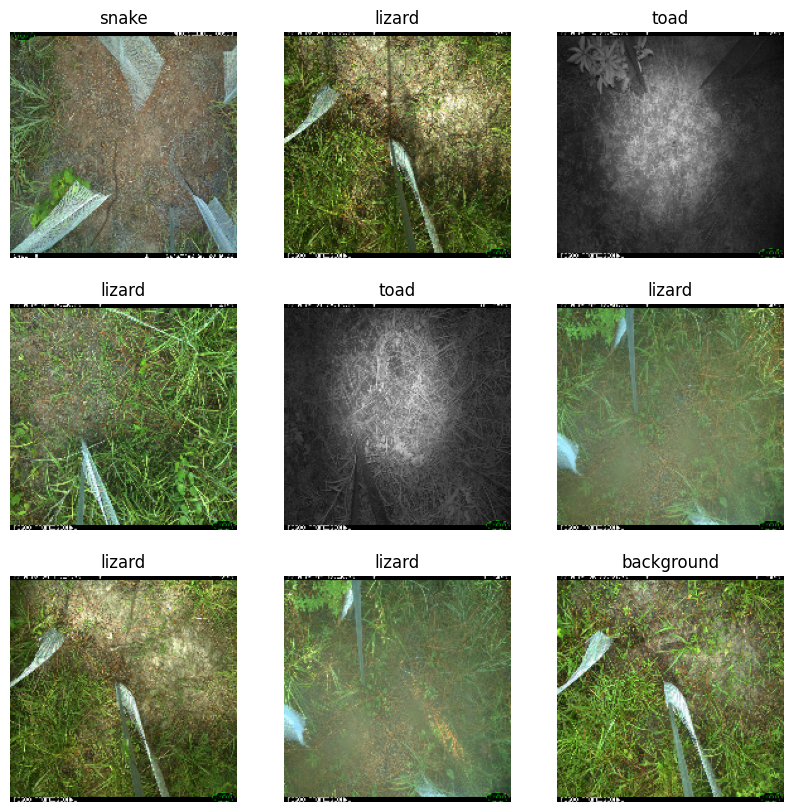

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - accuracy: 0.5633 - loss: 1.7719 - val_accuracy: 0.8520 - val_loss: 0.3943
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.8920 - loss: 0.3044 - val_accuracy: 0.9200 - val_loss: 0.2390
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 302ms/step - accuracy: 0.9362 - loss: 0.1914 - val_accuracy: 0.9220 - val_loss: 0.2101
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 289ms/step - accuracy: 0.9585 - loss: 0.1351 - val_accuracy: 0.9530 - val_loss: 0.1279
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 289ms/step - accuracy: 0.9624 - loss: 0.1052 - val_accuracy: 0.9550 - val_loss: 0.1350
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.9737 - loss: 0.0802 - val_accuracy: 0.9580 - val_loss: 0.1220
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 274ms/step - accuracy: 0.9748 - loss: 0.0744 - val_accuracy: 0.9600 - val_loss: 0.1156
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 274ms/step - accuracy: 0.9805 - loss: 0

Text(0.5, 1.0, 'Loss')

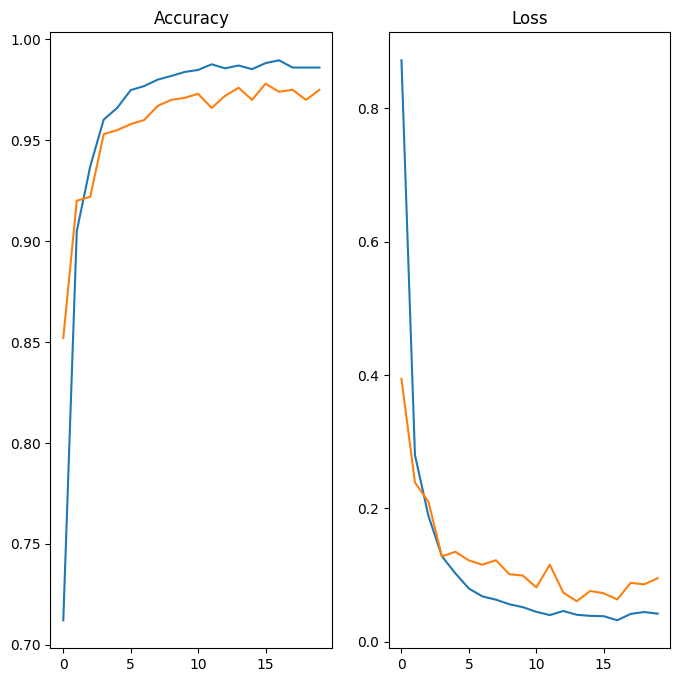

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [14]:
image = 'sanpii.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [15]:
predict = model.predict(img_bat)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[ 8.828886 ,  3.4044633, -4.1606   , -5.910775 ]], dtype=float32)

In [16]:
score = tf.nn.softmax(predict)
score

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[9.9560910e-01, 4.3882560e-03, 2.2741885e-06, 3.9512571e-07]],
      dtype=float32)>

In [17]:
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

image is background with accuracy of 99.56


In [ ]:
model.save('Image_classify.keras')

In [23]:
image = 'ddddy.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [24]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [25]:
score = tf.nn.softmax(predict)

In [26]:
print(' image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

 image is background with accuracy of 98.53
